# Data Analysis of NBA Players

Inspired by the movie "Moneyball" where Jonah Hill plays an accountant that discorves he can build a good baseball team only looking at the statiscs of each player, I decided to try to do something similar with NBA players. So I thought I could unite the desire of doing something like Jonah Hill does in the movie with my desire to understand basketball better and do an analysis of this dataset of the NBA players statistics.

Initially I'm going to do some basic and general analysis of the data, but at the and of this project I hope to build an NBA team with the basketball knowledge acquired in this project.

### explain better the data

The datset can be found here: https://www.kaggle.com/justinas/nba-players-data

### Libraries used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [2]:
df = pd.read_csv('all_seasons.csv')

### Index of the columns

- (**player_name**) Player name;   **There are more than one entry for each player (one for each season).
- (**team_abbreviation**) Team played in the season;
- (**age**) Age of the player in the end of the season;
- (**player_height**) Height of the player in the end of the season;
- (**player_weight**) Weight of the player in the end of the season;
- (**college**) Wich college he played;
- (**country**) Wich country he is from;
- (**draft_year**) Wich year he was drafted;
- (**draft_round**) Wich round he was drafted;
- (**draft_number**) His drafted number;
- (**gp**) Games played that season;
- (**pts**) Points made in that season;
- (**reb**) Rebounds made in that season;
- (**ast**) Assists made in that season;
- (**net_rating**) Net rating in that season (offensive rating minus defense rating);
- (**oreb_pct**) Offensive rebounds percentage in that season;
- (**dreb_pct**) Defensive rebounds percentage in that season;
- (**usg_pct**) Usage percentage (estimate of the team plays used by a player while he was on the floor);
- (**ts_pct**) True shooting percentage;
- (**ast_pct**) Assist percentage;
- (**season**) Season of the data. 

For a more detailed description: https://www.basketball-reference.com/about/glossary.html#fga

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [3]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


The data was already clean, so I didn't needed to clean it!

### Getting diferent data frame for each season

df_96_97 = df[df['season'] == '1996-97']
df_97_98 = df[df['season'] == '1997-98']
df_98_99 = df[df['season'] == '1998-99']
df_99_00 = df[df['season'] == '1999-00']
df_00_01 = df[df['season'] == '2000-01']
df_01_02 = df[df['season'] == '2001-02']
df_02_03 = df[df['season'] == '2002-03']
df_03_04 = df[df['season'] == '2000-04']
df_04_05 = df[df['season'] == '2000-05']
df_05_06 = df[df['season'] == '2000-06']
df_06_07 = df[df['season'] == '2000-07']
df_07_08 = df[df['season'] == '2000-08']

Not used for now! Maybe in the future i am going to find some use for it!

## Influence of the colleges on NBA.

The USA sports have a tradition to draft the players from college teams, and with basketball this isn't different. So here I made an analysis of the influence of the colleges on the NBA. 

### Which colleges mold more NBA players?

In [4]:
df_uniq = df.drop_duplicates(subset=['player_name'],keep='first')

In [5]:
df_uniq['college'].value_counts().iloc[:10]

None              344
Kentucky           66
Duke               54
UCLA               48
Kansas             47
North Carolina     47
Arizona            42
Syracuse           33
Michigan           32
Georgia Tech       30
Name: college, dtype: int64

For my surprise a lot of NBA players joined not trough college and decided to further analyze that. 

At first, accessing the NBA without a college degree seems like it is a good idea, but it only representes 15.39% os the players.

 There may be a hole in this analysis, I might need to look the *Undrafted* players other than those who have the college as *None*.

### The year that more players joined NBA without a college degree (did't played for a college baskeball team)

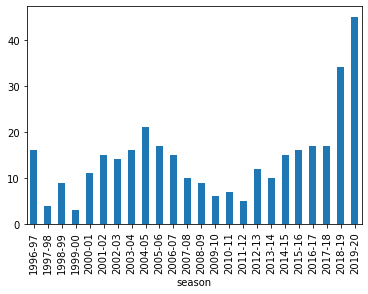

In [6]:
df_uniq[df_uniq['college'] == 'None'].groupby(['season'])['player_name'].count().plot.bar(label='_nolegend_')
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

There may be a trend on the NBA teams for hiring non college players, but this can only be verified with the data from upcoming years.

### Do non college players were getteing better net ratings in the last years?

One hypothesis is that in the last years players whom joined NBA not trough college where getting better net ratings, or at least similar ones, than the ones how joined trough college.

**Why the *net ratings* to compare the players?**

The net rating measures how well the team does while that player is on the court. Basically it takes the points made subtracts by the poins suffered.

In [7]:
# Making a dataframe only with 'None' as college in the last years
df_None = df[(df['college'] == 'None') & ((df['season'] == '2012-13') | (df['season'] == '2013-14') | (df['season'] == '2014-15') |
                                          (df['season'] == '2015-16') | (df['season'] == '2016-17') | (df['season'] == '2017-18') |
                                         (df['season'] == '2018-19') | (df['season'] == '2019-20'))]

# Making a dataframe without 'None' as college in the last years
df_college = df[(df['college']  != 'None')  & ((df['season'] == '2012-13') | (df['season'] == '2013-14') | (df['season'] == '2014-15') |
                                          (df['season'] == '2015-16') | (df['season'] == '2016-17') | (df['season'] == '2017-18') |
                                         (df['season'] == '2018-19') | (df['season'] == '2019-20'))]

Now I want to make a bar plot of the mean net rating at each year!

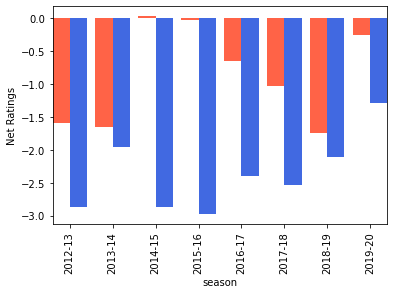

In [10]:
fig = plt.figure() 

ax = plt.subplot(111) 

width = 0.4

df_None.groupby(['season'])['net_rating'].mean().plot(kind='bar', color='tomato', width=width, position=1,align ='center')
df_college.groupby(['season'])['net_rating'].mean().plot(kind='bar', color='royalblue', width=width, position=0,align ='center')

ax.set_ylabel('Net Ratings')
ax.autoscale(tight=True,axis='x')

plt.show()

We can see that in the latest years the mean net ratings were better for the non college players and that might indicate why its increasing nuber on NBA.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### I tried to look at the comparission in all the years, but it wasn't promising....

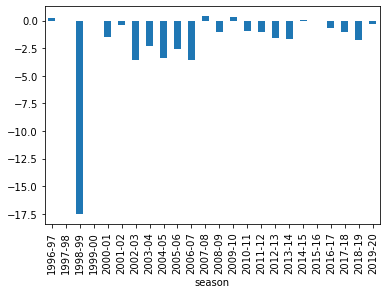

In [32]:
df_None.groupby(['season'])['net_rating'].mean().plot.bar(label='_nolegend_')

There is something wrong in the season 1998-1999. Lets look at it!

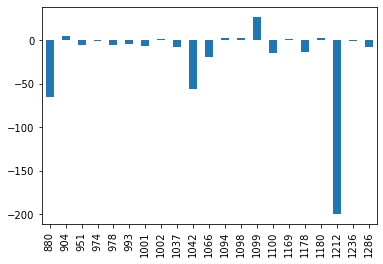

In [38]:
df_None[df_None['season']=='1998-99']['net_rating'].plot.bar()

So there were a player who had a terrible season, and it's worth to exclude him for this analysis!

df_None.drop(df_None.loc[df_None['Unnamed: 0']==1212].index, inplace=True)

In [46]:
df_None = df_None[df_None['Unnamed: 0'] != 1212]

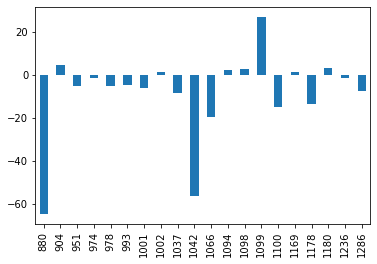

In [47]:
df_None[df_None['season']=='1998-99']['net_rating'].plot.bar()

Now doing the 

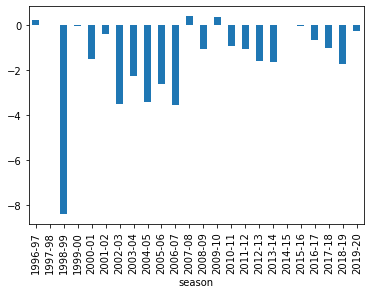

In [48]:
df_None.groupby(['season'])['net_rating'].mean().plot.bar(label='_nolegend_')

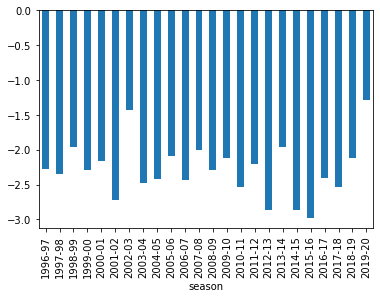

In [49]:
df_college.groupby(['season'])['net_rating'].mean().plot.bar(label='_nolegend_')

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Now lets see wich college makes (in average) the best players

df.groupby(['college'])['net_rating'].mean().plot.bar(label='_nolegend_')

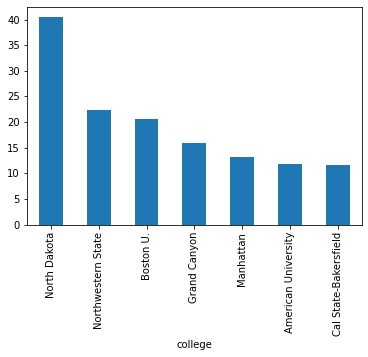

In [22]:
df.groupby(['college']).mean()['net_rating'].nlargest(7).plot(kind='bar')

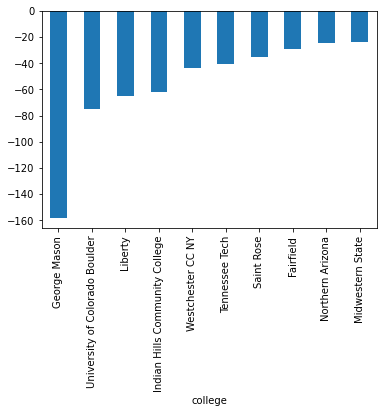

In [26]:
df.groupby(['college']).mean()['net_rating'].nsmallest(10).plot(kind='bar')

### future questions: best player (net rating) of this period, best college nba player maker (net rating), height x reb, heatmap, 